In [2]:
import os
from dotenv import load_dotenv
from openai import OpenAI
import yfinance as yf
import numpy as np
import pandas as pd
import json

In [3]:
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key = api_key)

In [4]:
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    history = stock.history(period="7d")
    dates = history.index.strftime("%Y-%m-%d").tolist()
    prices = history["Close"].tolist()

    return dates, prices

def draw_graph(dates, prices, ticker):
    import matplotlib.pyplot as plt
    plt.plot(dates, prices, color = 'pink', marker = 'o', label = ticker)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title(f"{ticker} Price History")
    plt.legend()
    plt.show()

In [5]:
def analyze_stock_trend(ticker):
    dates, prices = get_stock_data(ticker)
    
    price_diff = np.diff(prices)
    trend = "상승" if sum(price_diff) > 0 else "하락"
    avg_price = np.mean(prices)
    volatility = np.std(prices)
    draw_graph(dates, prices, ticker)
    messages = [
        {"role": "system", "content": "너는 금융 시장을 분석하는 AI야."},
        {"role": "user", "content": f"{ticker}의 최근 7일간 주가 데이터야. 이를 기반으로 향후 전망을 분석해줘."},
        {"role": "user", "content": f"날짜: {dates}"},
        {"role": "user", "content": f"주가: {prices}"},
        {"role": "user", "content": f"주가 변동 추세: {trend}, 평균 가격: {avg_price:.2f}, 변동성: {volatility:.2f}"}
    ]

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages
    )
    response_dict = response.to_dict()
    return response_dict["choices"][0]["message"]["content"]

In [6]:
tools = [
    {
        "type": "function",
        "function": {
            "name": "get_stock_price",
            "description": "특정 기업의 현재 주가를 가져옴",
            "parameters": {
                "type": "object",
                "properties": {
                    "ticker": {
                        "type": "string",
                        "description": "주가를 조회할 기업의 주식 코드 (예: AAPL, TSLA, GOOG)",
                    }
                },
                "required": ["ticker"],
            },
        },
    }
]

In [7]:
response = client.chat.completions.create(
    model = "gpt-4o-mini",
    messages = [
        {"role" : "user", "content" : "nvidia의 현재 주가 알려줘"},#role, content 고정
    ],
    tools = tools,
    tool_choice = "auto"
    
)

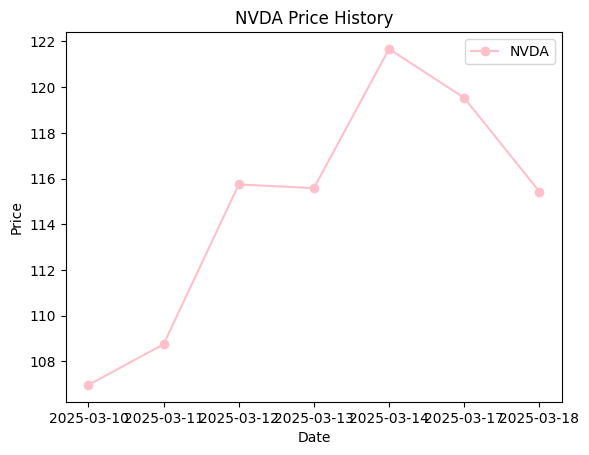

주어진 데이터를 기반으로 NVIDIA(NVDA)의 최근 7일간 주가 분석을 진행해보겠습니다.

### 주가 데이터 개요
- **주가 변동 추세**: 상승
- **평균 가격**: 114.81 USD
- **변동성**: 4.92 USD

### 분석 내용

1. **상승 경향**: 지난 7일간 NVDA의 주가는 전반적으로 상승세를 보였습니다. 특히 큰 폭의 상승이 있었던 3월 12일에는 이전 대비 약 6.45% 상승했습니다. 이는 투자자들의 긍정적인 심리를 반영할 수 있으며, NVDA의 전반적인 성장 가능성을 나타낼 수 있습니다.

2. **평균 가격**: 평균 가격이 114.81 USD로, 최근의 상승세로 인해 향후 주가가 이 평균 근처에서 안정될 가능성이 큽니다. 현재 주가가 이 평균에 가까워질수록 저항선이 될 수 있습니다.

3. **변동성**: 변동성은 4.92 USD로, 이는 상대적으로 높은 수치입니다. 이는 최근 주가가 큰 변화를 보였음을 나타냅니다. 주가의 변동성이 높다는 것은 주식의 위험성이 상대적으로 크다는 의미이며, 단기 투자자에게는 매력적으로 작용할 수 있지만 장기 투자자에게는 우려를 유발할 수 있습니다.

### 향후 전망

- **긍정적 전망**: 지속적인 상승세가 유지된다면, NVDA는 향후 몇 주간 추가적인 상승이 가능할 수 있습니다. 기술적 지표나 소식에 따라 더 높은 거래량을 기록하거나, 긍정적인 기업 실적 발표 등이 주가에 긍정적인 영향을 미칠 수 있습니다.
  
- **부정적 전망**: 하지만 변동성이 큰 만큼, 외부 요인이나 시장 상황에 따라 급격한 하락이 있을 수도 있으니 주의가 필요합니다. 특히 경제 지표나 업계 뉴스에 따라 주가가 크게 요동칠 가능성이 있습니다.

### 결론
NVDA는 현재 긍정적인 상승세를 보이고 있지만, 높은 변동성으로 인해 위험 관리가 필요한 시점입니다. 투자에 앞서 다양한 기술적 분석 및 시장 상황을 모니터링하며, 이상 신호가 보일 경우 신속하게 대응하는 것이 중요할 것입니다.


In [ ]:
response_dict = response.to_dict()

if "tool_calls" in response_dict["choices"][0]["message"]:
    tool_call = response_dict["choices"][0]["message"]["tool_calls"][0]
    function_name = tool_call["function"]["name"]
    arguments = json.loads(tool_call["function"]["arguments"])


    if function_name == "get_stock_price":
        ticker = arguments["ticker"]
        analysis_result = analyze_stock_trend(ticker)
        print(f"{analysis_result}")